In [1]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


In [3]:
ticker = 'RELIANCE.NS'
data = pd.DataFrame()
data[ticker]= wb.DataReader(ticker, data_source = 'yahoo' , start = '2010-1-1')['Adj Close']


In [5]:
data.tail(), data.head()

(            RELIANCE.NS
 Date                   
 2020-07-20  1919.900024
 2020-07-21  1971.550049
 2020-07-22  2004.000000
 2020-07-23  2057.800049
 2020-07-24  2146.149902,
             RELIANCE.NS
 Date                   
 2010-01-04   457.306488
 2010-01-05   455.265503
 2010-01-06   462.621460
 2010-01-07   470.296417
 2010-01-08   469.063354)

In [6]:
log_return = np.log(1 + data.pct_change())

In [8]:
log_return.tail()

,RELIANCE.NS
Date,
2020-07-20,0.004280
2020-07-21,0.026547
2020-07-22,0.016325
2020-07-23,0.026492
2020-07-24,0.042038


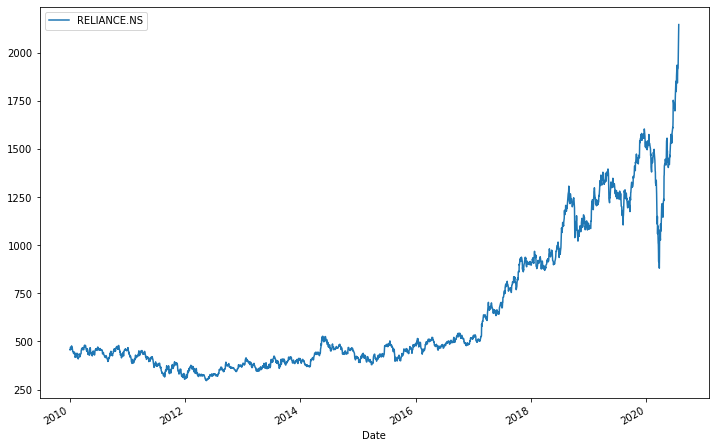

In [9]:
data.plot(figsize = (12,8))

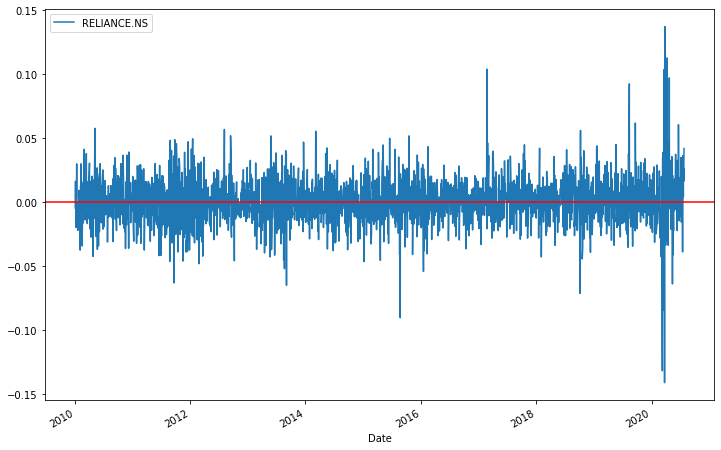

In [14]:
log_return.plot(figsize = (12,8))
plt.axhline(0 , color = 'r')

In [17]:
u = log_return.mean()
u

RELIANCE.NS    0.000595
dtype: float64

In [19]:
var = log_return.var()
var

RELIANCE.NS    0.000325
dtype: float64

In [21]:
stdev = log_return.std()
stdev

RELIANCE.NS    0.018017
dtype: float64

In [24]:
drift = u - (0.5*var)
drift

RELIANCE.NS    0.000432
dtype: float64

In [25]:
drift.values

array([0.00043234])

In [26]:
stdev.values

array([0.0180172])

In [27]:
t_interval = 1000
iterations = 10

In [28]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_interval,iterations)))

In [29]:
daily_returns

array([[1.01313418, 0.9956259 , 1.01118467, ..., 0.99358849, 0.98969425,
        1.00916234],
       [1.04661742, 0.98347731, 1.00549267, ..., 0.98149375, 1.02088492,
        1.00190401],
       [1.02817715, 0.98866465, 0.99545921, ..., 0.99715375, 1.00650579,
        0.97877582],
       ...,
       [1.00451508, 0.99132912, 0.98118088, ..., 0.99595989, 1.01654687,
        1.02653091],
       [0.97378714, 1.00925427, 0.99845833, ..., 1.00412009, 0.99829389,
        1.00126727],
       [0.97149996, 1.00150796, 0.99574791, ..., 0.97619237, 1.02816278,
        0.99435792]])

In [31]:
s0 = data.iloc[-1]
s0

RELIANCE.NS    2146.149902
Name: 2020-07-24 00:00:00, dtype: float64

In [32]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
price_list[0] = s0
price_list

array([[2146.14990234, 2146.14990234, 2146.14990234, ..., 2146.14990234,
        2146.14990234, 2146.14990234],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [37]:
for t in range(1,t_interval):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [39]:
price_list

array([[2146.14990234, 2146.14990234, 2146.14990234, ..., 2146.14990234,
        2146.14990234, 2146.14990234],
       [2246.197871  , 2110.68972926, 2157.93798548, ..., 2106.43271057,
        2190.97206383, 2150.23619633],
       [2309.48933268, 2086.76433214, 2148.13924157, ..., 2100.43726812,
        2205.22606703, 2104.59920401],
       ...,
       [1172.94891866, 6530.9961485 , 2924.8589911 , ..., 2879.28608461,
        5335.79806572, 4385.32791376],
       [1142.20257666, 6591.43575137, 2920.34983368, ..., 2891.1489892 ,
        5326.69460394, 4390.88532147],
       [1109.64975582, 6601.37537073, 2907.93223547, ..., 2822.31757708,
        5476.70911243, 4366.11160376]])

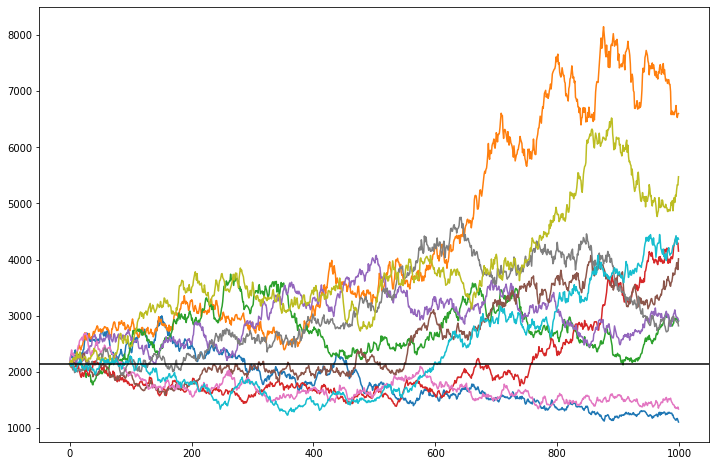

In [43]:
plt.figure(figsize = (12,8))
plt.plot(price_list)
plt.axhline(2146 , color = 'black')